## Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import math

In [9]:
data = np.genfromtxt('MultipleLR.csv',delimiter=',')

In [10]:
x1= data[:,0]
x2= data[:,1]
x3= data[:,2]
y= data[:,-1]
y=y.reshape((-1,1))

##multivariable minibatch gradientdescent

In [11]:
def multiVar_miniBatch_GD(in_data,learning_rate,iter):
    
   
    m,n=data.shape
    x_vec=np.ones((m,n))

    thetas = np.zeros([n,1])
    theta_zeros= []
    theta_ones = []
    theta_2s = []
    theta_3s = []


    for i in range(n-1):
      x_vec[:,i+1]=data[:,i]
    target = in_data[:,-1]
  
    #target=target.reshape((-1,1))

    p=5
    hypothsis =[]
    MSE=[]
    epoch=[]

    theta_zeros.append(0)
    theta_ones.append(0)
    theta_2s.append(0)
    theta_3s.append(0)

    target=target.reshape((-1,1))
   
    epoch_num=iter//p

    epoch_num
    for i in range(epoch_num):
        for j in range(p): 
           
            y_predict =  x_vec @ thetas
           
            hypothsis.append(y_predict)

            gradient= (-1/p) * ((target-y_predict).transpose() @ x_vec )
           
            thetas= thetas - (learning_rate * gradient.transpose())
          
            
        
        MSE.append( np.linalg.norm(target-y_predict, ord=2) * (2/p))
        epoch.append(i)
    
        if i>0:
             if (abs(MSE[i]-MSE[i-1])<0.001):
                break
             if(abs(np.linalg.norm([theta_zeros[i],theta_ones[i]]) -  np.linalg.norm([theta_zeros[i-1],theta_ones[i-1]]) ) <0.001):
               break
        if(i!=epoch_num-1):
          theta_zeros.append(thetas[0])
          theta_ones.append(thetas[1])
          theta_2s.append(thetas[2])
          theta_3s.append(thetas[3])
    return theta_zeros,theta_ones,theta_2s,theta_3s,MSE,hypothsis,thetas,x_vec,epoch



In [12]:
theta_zeros,theta_ones,theta_2s,theta_3s,MSE,hypothsis,thetas,x_vec,epoch = multiVar_miniBatch_GD(data,0.000001,100)
print(thetas)


[[0.00825336]
 [0.66529226]
 [0.66877572]
 [0.68866156]]


In [13]:
y_predicted= x_vec @ thetas
print(y_predicted.shape)
print(y.shape)

(25, 1)
(25, 1)


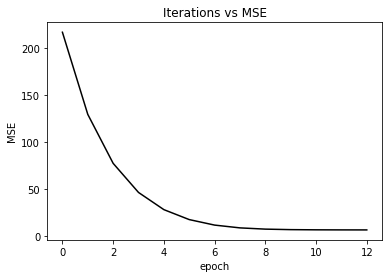

In [14]:
plt.plot(epoch,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.title("Iterations vs MSE")
plt.show()

In [15]:
r2_score(y, y_predicted)

0.9788692796969916

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


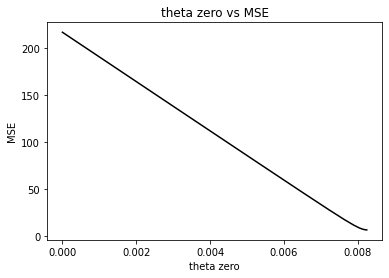

In [16]:
plt.plot(theta_zeros,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("theta zero")
plt.ylabel("MSE")
plt.title("theta zero vs MSE")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


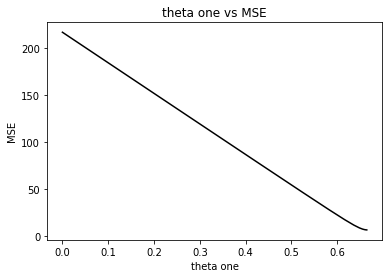

In [17]:
plt.plot(theta_ones,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("theta one")
plt.ylabel("MSE")
plt.title("theta one vs MSE")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


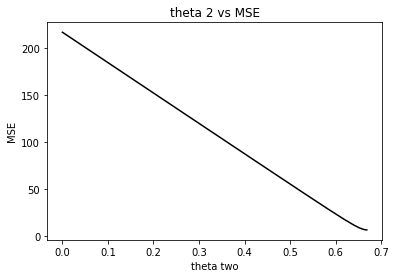

In [18]:
plt.plot(theta_2s,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("theta two")
plt.ylabel("MSE")
plt.title("theta 2 vs MSE")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


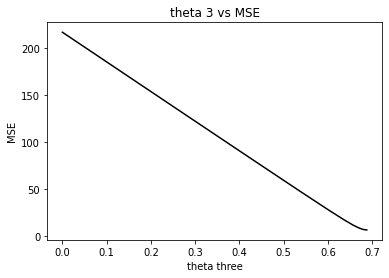

In [20]:
plt.plot(theta_3s,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("theta three")
plt.ylabel("MSE")
plt.title("theta 3 vs MSE")
plt.show()

##multivarient adam batch

In [22]:
def multiVar_batch_GD_adam(in_data,learning_rate,epsilon,beta_one,beta_two,iter):
    
   
    m,n=data.shape
    x_vec=np.ones((m,n))

    thetas = np.zeros([n,1])
    M = np.zeros([n,1])
    V = np.zeros([n,1])

    for i in range(n-1):
      x_vec[:,i+1]=data[:,i]
    target = in_data[:,-1]
  

    itr=[]
    MSE=[]

    theta_zeros= []
    theta_ones = []
    theta_2s = []
    theta_3s = []

    
    theta_zeros.append(0)
    theta_ones.append(0)
    
    theta_2s.append(0)
    theta_3s.append(0)

    target=target.reshape((-1,1))


    for i in range(iter):
        
           
        y_predict =  x_vec @ thetas 
    
        #hypothsis.append(y_predict)
        
    
        gradient= (-1/m) * ((target-y_predict).transpose() @ x_vec )
    
        
        M = (M *beta_one ) +  (1-beta_one) * gradient.transpose() 
        V = (V *beta_two ) +  (1-beta_two) * ( gradient.transpose() **2)
        
        v_sq = np.sqrt(V)
        
        
        thetas= thetas - (learning_rate / ( v_sq + epsilon)) * M
       
    
        MSE.append( np.linalg.norm(target-y_predict, ord=2) * (2/m))
        itr.append(i)

   
        if i>0:
             if (abs(MSE[i]-MSE[i-1])<0.0001):
                break
             if(abs(np.linalg.norm([theta_zeros[i],theta_ones[i],theta_2s[i],theta_3s[i]]) -  np.linalg.norm([theta_zeros[i-1],theta_ones[i-1],theta_2s[i-1],theta_3s[i-1]]) ) <0.0001):
                break
        if(i!=iter-1):
          theta_zeros.append(thetas[0])
          theta_ones.append(thetas[1])
          theta_2s.append(thetas[2])
          theta_3s.append(thetas[3])
    return theta_zeros,theta_ones,theta_2s,theta_3s,MSE,thetas,x_vec,itr

In [23]:
theta_zeros,theta_ones,theta_2s,theta_3s,MSE,thetas,x_vec,itr = multiVar_batch_GD_adam(data,0.01,0.00000001,0.00000001,1e-10,100000)
#multiVar_batch_GD_adam(data,0.04,0.6,0.03,1e-10,100000)
print(thetas)

[[0.67997921]
 [0.67998421]
 [0.67998389]
 [0.6799898 ]]


In [24]:
y_predicted= x_vec @ thetas

In [25]:
r2_score(y, y_predicted)

0.9722078542535444

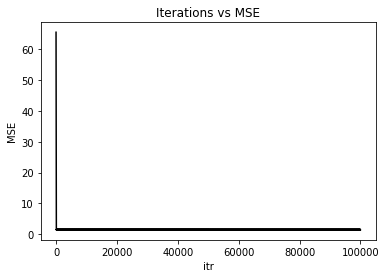

In [26]:
plt.plot(itr,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("itr")
plt.ylabel("MSE")
plt.title("Iterations vs MSE")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


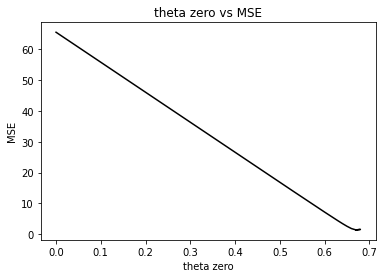

In [27]:
plt.plot(theta_zeros,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("theta zero")
plt.ylabel("MSE")
plt.title("theta zero vs MSE")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


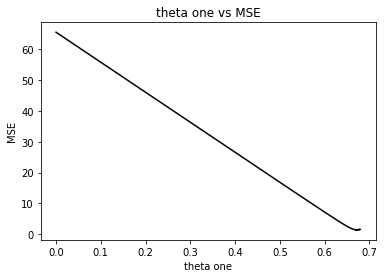

In [28]:
plt.plot(theta_ones,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("theta one")
plt.ylabel("MSE")
plt.title("theta one vs MSE")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


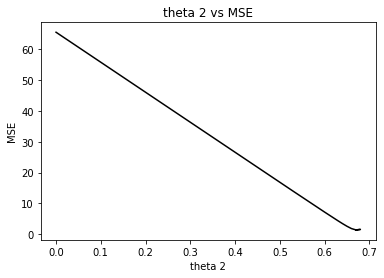

In [29]:
plt.plot(theta_2s,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("theta 2")
plt.ylabel("MSE")
plt.title("theta 2 vs MSE")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


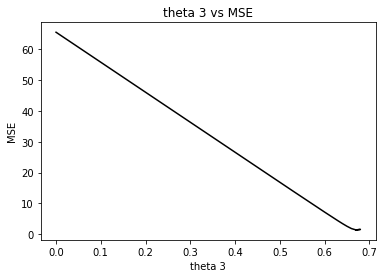

In [30]:
plt.plot(theta_3s,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("theta 3")
plt.ylabel("MSE")
plt.title("theta 3 vs MSE")
plt.show()

## multivarient adam minibatch


In [31]:
def multiVar_minibatch_GD_adam(in_data,learning_rate,epsilon,beta_one,beta_two,iter):
    
   
    m,n=data.shape
    x_vec=np.ones((m,n))

    thetas = np.zeros([n,1])
    M = np.zeros([n,1])
    V = np.zeros([n,1])

    for i in range(n-1):
      x_vec[:,i+1]=data[:,i]
    target = in_data[:,-1]
  
    #target=target.reshape((-1,1))

    p=5
    hypothsis =[]
    MSE=[]
    epoch=[]

    theta_zeros= []
    theta_ones = []
    theta_2s = []
    theta_3s = []

    
    theta_zeros.append(0)
    theta_ones.append(0)
    
    theta_2s.append(0)
    theta_3s.append(0)

    target=target.reshape((-1,1))
   
    epoch_num=iter//p

    
    for i in range(epoch_num):
        for j in range(p): 
           
            y_predict =  x_vec @ thetas
           
            hypothsis.append(y_predict)

            gradient= (-1/p) * ((target-y_predict).transpose() @ x_vec )

            M = (M *beta_one ) +  (1-beta_one) * gradient.transpose() 
            V = (V *beta_two ) +  (1-beta_two) * ( gradient.transpose() **2)
        
            v_sq = np.sqrt(V)
           
            thetas = thetas - (learning_rate / ( v_sq + epsilon)) * M
       
        
        MSE.append( np.linalg.norm(target-y_predict, ord=2) * (2/p))
        epoch.append(i)
    
        if i>0:
             if (abs(MSE[i]-MSE[i-1])<0.001):
                break
             if(abs(np.linalg.norm([theta_zeros[i],theta_ones[i],theta_2s[i],theta_3s[i]]) -  np.linalg.norm([theta_zeros[i-1],theta_ones[i-1],theta_2s[i-1],theta_3s[i-1]]) ) <0.001):
                break
        if(i!=epoch_num-1):
          theta_zeros.append(thetas[0])
          theta_ones.append(thetas[1])
          theta_2s.append(thetas[2])
          theta_3s.append(thetas[3])
    return theta_zeros,theta_ones,theta_2s,theta_3s,MSE,hypothsis,thetas,x_vec,epoch


In [32]:
theta_zeros,theta_ones,theta_2s,theta_3s,MSE,hypothsis,thetas,x_vec,epoch = multiVar_minibatch_GD_adam(data,0.02,0.00001,0.00001,1e-10,1000)
#multiVar_minibatch_GD_adam(data,0.02,0.6,0.2,1e-10,1000)
print(thetas)


[[0.68009914]
 [0.68009123]
 [0.68008989]
 [0.68012159]]


In [33]:
y_predicted= x_vec @ thetas

In [34]:
r2_score(y, y_predicted)

0.9720228089854146

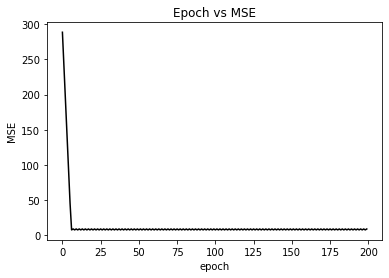

In [35]:
plt.plot(epoch,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.title("Epoch vs MSE")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


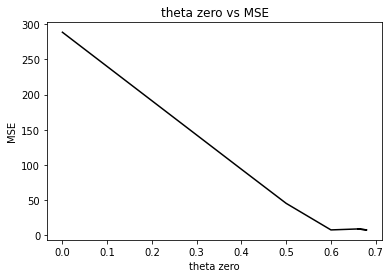

In [36]:
plt.plot(theta_zeros,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("theta zero")
plt.ylabel("MSE")
plt.title("theta zero vs MSE")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


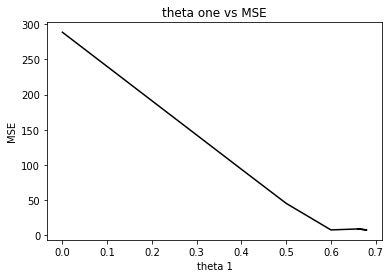

In [37]:
plt.plot(theta_ones,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("theta 1")
plt.ylabel("MSE")
plt.title("theta one vs MSE")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


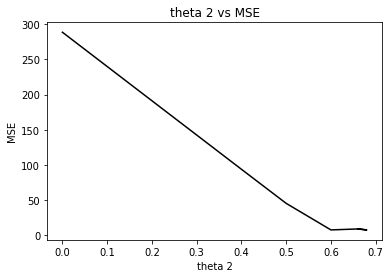

In [38]:
plt.plot(theta_2s,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("theta 2")
plt.ylabel("MSE")
plt.title("theta 2 vs MSE")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


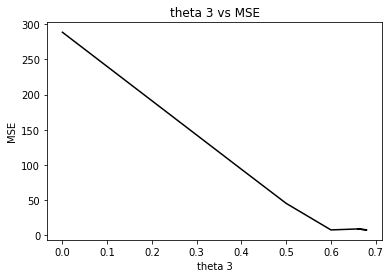

In [39]:
plt.plot(theta_3s,MSE, color='black',markerfacecolor='red',linestyle='-')
plt.xlabel("theta 3")
plt.ylabel("MSE")
plt.title("theta 3 vs MSE")
plt.show()